In [1]:
__nbid__ = '0009'
__author__ = 'David Nidever <david.nidever@noirlab.edu>, Knut Olsen <knut.olsen@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['nsc_dr2']
__keywords__ = ['science example', 'dwarf galaxies']

# Detección de galaxias enanas en NSC DR2

*David Nidever, Knut Olsen, Robert Nikutta, Stéphanie Juneau, & Astro Data Lab Team*

#### (_Traducción de [DwarfGalaxiesInNscDr2.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DwarfGalaxies/DwarfGalaxiesInNscDr2.ipynb)_)

### Tabla de contenido
* [Objetivos & resumen del notebook](#goals)
* [Avisos legales & atribuciones](#attribution)
* [Imports & configuración](#import)
* [Autenticación](#auth)
* [Prefacio](#preface)
* [Capítulo 1 - Fotometría que contiene enanas](#chapter1)
* [Capítulo 2 - Filtrado y graficado de enanas](#chapter2)
* [Capítulo 3 - Recuperar imágenes](#chapter3)
* [Recursos](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
En este notebook, demostramos el descubrimiento de compañeros enanos clásicos y débiles de la Vía Láctea en NSC DR2. Consultamos la base de datos alrededor de las posiciones de enanas conocidas y aplicamos técnicas de filtrado para revelar las enanas como sobredensidades espaciales de fuentes filtradas.

# Resumen

**Contexto**
Las galaxias enanas ultradébiles son cruciales para entender muchos aspectos del universo. Por ejemplo, están dominadas por materia oscura; su localización en el espacio puede trazar la estructura a gran escala de la distribución de materia oscura.

**Recuperación de datos**
Recuperaremos datos del catálogo NSC DR2 ([Nidever et al. 2020](https://arxiv.org/abs/2011.08868)) y buscaremos sobredensidades de objetos azules.

Las columnas requeridas son AR, Dec y las magnitudes g, r, i.

**Detección**
Convolucionaremos la distribución espacial de nuestro conjunto de datos con un par de núcleos gaussianos y restaremos los resultados, como se hace por ejemplo en [Stanford et al. (2005, ApJ, 634, 2, L129)](http://adsabs.harvard.edu/abs/2005ApJ...634L.129S) (cúmulos de galaxias), o [Koposov et al. (2008, ApJ, 686, 279)](http://adsabs.harvard.edu/abs/2008ApJ...686..279K) (satélites de la Vía Láctea). Esto tiene el efecto de convolucionar la distribución espacial con un filtro de sombrero mexicano, útil para detectar objetos a una escala espacial deseada.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Librería estándar
from getpass import getpass

# De 3ros
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib
from astropy import utils, io, convolution, stats, wcs
from astropy.visualization import make_lupton_rgb
from astropy import units as u
from astropy.stats import median_absolute_deviation as mad
from astropy.coordinates import name_resolve
%matplotlib inline

# De Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers

# Servicio de Acceso Simple a Imágenes (SIA)
from pyvo.dal import sia
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia"
svc = sia.SIAService(DEF_ACCESS_URL)

# Silenciar las advertencias de Astropy
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="preface"></a>
# Prefacio
Vamos a seleccionar la base de datos y definir algunas funciones que usaremos más adelante.

In [2]:
# Esquema NSC DR1
try:
    print(qc.schema('nsc_dr2', profile='default'))
except Exception as e:
    print(e.message)


Schema: nsc_dr2

      Table Name   Description
      ----------   -----------
            chip   CCD information table (24,416,997 rows)
        coverage   Survey coverage table (172,157,952 rows)
        exposure   Exposures contributing to the catalog (412,116 rows)
            meas   Primary measurements table (67,822,619,019 rows)
          object   Primary object table (3,932,838,064 rows)
        variable   Table for internal use
x1p5__object__allwise__source   nsc_dr2.object and allwise.source crossmatch (1.5 arcsec)
x1p5__object__catwise2020__main   xmatch_std.nsc_dr2__object and catwise2020.main crossmatch
                   (1.5 arcsec)
x1p5__object__decaps_dr1__object   nsc_dr2.object and decaps_dr1.object crossmatch (1.5 arcsec)
x1p5__object__decaps_dr2__object   xmatch_std.nsc_dr2__object and decaps_dr2.object crossmatc
                   h (1.5 arcsec)
x1p5__object__delve_dr1__objects   nsc_dr2.object and delve_dr1.objects crossmatch (1.5 arcsec)
x1p5__object__delve_dr2

In [3]:
# Una función para recuperar datos desde un punto en el cielo
def obtener_datos (ra,dec,radio=1.0,columnas='*'):

    query_template = \
    """SELECT {0:s} FROM nsc_dr2.object
       WHERE q3c_radial_query(ra,dec,{1:f},{2:f},{3:f})"""

    query = query_template.format(columnas,ra,dec,radio)
    print(query)
    
    try:
        result = qc.query(sql=query) # Por omisión, el resultado es una cadena en formato CSV
    except Exception as e:
        print(e.message)
        
    df = helpers.utils.convert(result,'pandas')
    
    return df

In [4]:
# Filtro de convolución tipo sombrero mexicano
def filtro_de_enanas (ra,dec,fwhm_small=2.0,fwhm_big=20):

    """Convolución diferencial con núcleos gaussianos 2D.
    
       Basado en Koposov et al. (2008).
       Código por Ken Mighell y Mike Fitzpatrick.
       Pequeñas modificaciones por RN.
       
       Parámetros
       ----------
       ra, dec : float o array
           RA & Dec en grados.
    
       fwhm_small, fwhm_big : float
           Tamaños de ancho completo a la mitad (FWHM) de los núcleos gaussianos pequeño y grande
           para usar en la convolución, en minutos de arco.
    """
    
    x, y = ra, dec

    print("Calculando convolución diferencial")

    # Información sobre la declinación (y) [grados]
    ymean = (y.min() + y.max()) / 2.0
    ydiff_arcmin = (y.max() - y.min()) * 60.0 # convertir de grados a minutos de arco

    # Información sobre la ascensión recta (x) [grados en tiempo]:
    xdiff = x.max() - x.min() # separación angular [grados (tiempo)] 
    xmean = (x.min() + x.max()) / 2.0

    # Convertir de grados en tiempo a separación en grados angulares:
    xdiff_angular = (x.max() - x.min()) * np.cos(ymean*(np.pi/180.0))

    # Convertir de grados a minutos de arco
    xdiff_angular_arcmin = xdiff_angular * 60.0 

    # Obtener el número de pixeles de un minuto de arco en las direcciones x y y:
    nx = np.rint(xdiff_angular_arcmin).astype('int')
    ny = np.rint(ydiff_arcmin).astype('int')

    # Crear un histograma 2D de los conteos brutos:
    Counts, xedges, yedges  = np.histogram2d (x, y, (nx,ny) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    raw_hist = np.rot90(Counts).copy() # hack alrededor de la rareza pythonica

    # Crear los núcleos gaussianos pequeño y grande con desviación estándar
    # del FWHM dado en pixeles de minutos de arco^2:
    kernel_small = convolution.Gaussian2DKernel(fwhm_small/2.35,factor=1)
    kernel_big = convolution.Gaussian2DKernel(fwhm_big/2.35,factor=1)

    # Calcular los núcleos de convolución diferencial:
    conv_big = convolution.convolve(raw_hist, kernel_big)
    conv_small = convolution.convolve(raw_hist, kernel_small)
    conv_delta = conv_small - conv_big
    delta = conv_delta.copy()

    # Calcular estadísticas y el piso:
    mean = np.mean(delta, dtype='float64')
    sigma = np.std(delta, dtype='float64')
    sigmaRaw = np.std(raw_hist,dtype='float64')
    floor = mean

    # Recorte según límites especificados.
    clipped = delta.copy()
    clipped[delta < floor] = floor

    # Devolver los campos calculados:
    return raw_hist, extent, delta, clipped, sigma

In [5]:
# Una pequeña función para descargar las imágenes apiladas más profundas
#   adaptada de R. Nikutta
def descargar_imagen_mas_profunda(ra,dec,fov=0.1,band='g'):
    imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
    print("La lista completa de imágenes contiene", len(imgTable), "entradas")
    
    sel0 = imgTable['obs_bandpass'] == band
    sel = sel0 & ((imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image')) # selección básica
    Table = imgTable[sel] # seleccionar
    if (len(Table)>0):
        row = Table[np.argmax(Table['exptime'].data.data.astype('float'))] # elegir la imagen con mayor tiempo de exposición
        url = row['access_url'] # obtener la URL de descarga
        print ('descargando imagen más profunda...')
        image = io.fits.getdata(utils.data.download_file(url,cache=True,show_progress=False,timeout=120))

    else:
        print ('No hay imagen disponible.')
        image=None
        
    return image

In [6]:
# Graficador multi-panel de imágenes
def graficar_imagenes(images,geo=None,panelsize=4,bands=list('gri'),cmap=matplotlib.cm.gray_r):
    n = len(images)
    if geo is None: geo = (n,1)
        
    fig = plt.figure(figsize=(geo[0]*panelsize,geo[1]*panelsize))
    for j,img in enumerate(images):
        ax = fig.add_subplot(geo[1],geo[0],j+1)
        if img is not None:
            print(img.min(),img.max())
            vmin = np.median(img)-2*np.std(img)
            vmax = np.median(img)+2*np.std(img)
            ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
            ax.set_title('Banda %s' % bands[j])
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

<a class="anchor" id="chapter1"></a>
# Capítulo 1 - Fotometría que contiene enanas
Tomamos las posiciones de cuatro galaxias enanas y consultamos la base de datos alrededor de ellas.

In [7]:
# Coordenadas codificadas; también se pueden resolver dinámicamente (ver más abajo)
name = ['Draco Dsph','Carina Dsph','Hya II','Eri II']

# Coordenadas estáticas; también se pueden resolver dinámicamente (ver más abajo)

ra = [260.059728, 100.40292, 185.42542, 56.0878]
dec = [57.921219, -50.96611, -31.98528, -43.5332]

radio = 0.85 # Radio de búsqueda en grados

# Solicitar a la base de datos estas columnas
columnas = '''ra,dec,gmag,gerr,imag,rmag,zmag,class_star,fwhm'''

In [8]:
def resolver_coordenadas(name):
    try:
        coords = name_resolve.get_icrs_coordinates(name)
    except Exception as e:
        raise

    ra = coords.ra.to('deg').value
    dec = coords.dec.to('deg').value      

    return coords, ra, dec        

In [9]:
# Recopilar los resultados de la consulta en este diccionario
df_dict = {dwarf: pd.DataFrame() for dwarf in name}

# Bucle sobre las enanas
for j,name_ in enumerate(name):
    print(name_)
# Descoméntame-  coords, ra_, dec_ = resolver_coordenadas(name_)  # resolver coordenadas dinámicamente
    coords, ra_, dec_ = None, ra[j], dec[j]  # usar coordenadas codificadas
    df = obtener_datos(ra_,dec_,radio=radio,columnas=columnas)
    df_dict[name_] = df
    print(str(len(df))+' objectos encontrados')

Draco Dsph
SELECT ra,dec,gmag,gerr,imag,rmag,zmag,class_star,fwhm FROM nsc_dr2.object
       WHERE q3c_radial_query(ra,dec,260.059728,57.921219,0.850000)
90835 objectos encontrados
Carina Dsph
SELECT ra,dec,gmag,gerr,imag,rmag,zmag,class_star,fwhm FROM nsc_dr2.object
       WHERE q3c_radial_query(ra,dec,100.402920,-50.966110,0.850000)
614912 objectos encontrados
Hya II
SELECT ra,dec,gmag,gerr,imag,rmag,zmag,class_star,fwhm FROM nsc_dr2.object
       WHERE q3c_radial_query(ra,dec,185.425420,-31.985280,0.850000)
280984 objectos encontrados
Eri II
SELECT ra,dec,gmag,gerr,imag,rmag,zmag,class_star,fwhm FROM nsc_dr2.object
       WHERE q3c_radial_query(ra,dec,56.087800,-43.533200,0.850000)
162625 objectos encontrados


<a class="anchor" id="chapter2"></a>
# Capítulo 2 - Filtrado y graficado de las enanas
Filtramos la fotometría para incluir objetos con S/N>10, que sean puntuales (CLASS_STAR, y FWHM), y que sean relativamente azules (*g-i* < 1.0). Convolucionamos el resultado con el filtro espacial definido arriba.

In [10]:
# Crear un WCS para una proyección en plano tangente en nuestra región
def get_wcs(ra,dec,image,fov=1.,unit='deg',projection=("RA---TAN","DEC--TAN")):
    npix = image.shape[0]
    crpix = npix/2 + 1
    cdelt = fov/float(npix)
    w = wcs.WCS(naxis=2)
    w.wcs.cunit = (unit,unit)
    w.wcs.crpix = (crpix,crpix)
    w.wcs.cdelt = np.array((-cdelt,cdelt))
    w.wcs.ctype = projection
    w.wcs.crval = (ra,dec) #coords.ra.to(unit).value, coords.dec.to(unit).value)
    return w

Draco Dsph
Calculando convolución diferencial
Carina Dsph
Calculando convolución diferencial
Hya II
Calculando convolución diferencial
Eri II
Calculando convolución diferencial


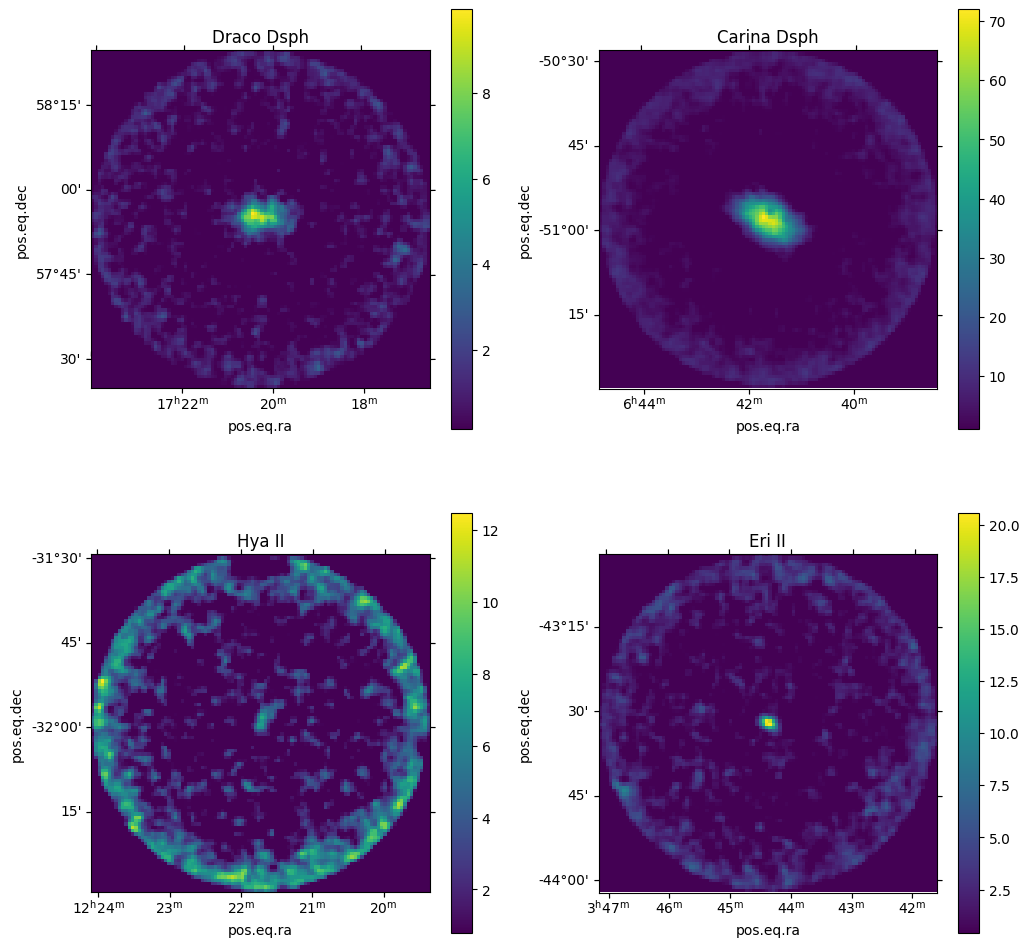

In [11]:
# Bucle sobre las enanas, filtrar y luego graficar un mapa de densidad
nrow, ncol = 2, 2
fig = plt.figure(figsize=(6*ncol,6*nrow))
for j,name_ in enumerate(df_dict):
    print(name_)
    df = df_dict[name_]
    keep = (df['gmag']<90) & (df['rmag']<90) & \
           1.087/df['gerr']>10 & \
           ((df['gmag']-df['rmag'])<1.0) & (df['gmag']>18) & ((df['gmag']-df['rmag'])>(-0.5)) & \
           (np.abs(df['class_star'])>0.8) & (df['fwhm']<2) 
    df2 = df[keep]
    raw_hist, extent, delta, clipped, sigma = filtro_de_enanas(df2['ra'],df2['dec'])
    #skyPlot(df2,ax)
    w = get_wcs(ra[j],dec[j],clipped,fov=1.)
    ax = fig.add_subplot(nrow,ncol,j+1,projection=w)
    im = plt.imshow(clipped)
    plt.colorbar()
    ax.set_title(name_)

<a class="anchor" id="chapter3"></a>
# Capítulo 3 - Recuperar imágenes
Demostramos cómo recuperar imágenes a través del servicio SIA (Simple Image Access).

In [12]:
# Obtener imágenes apiladas g, r e i para la tercera galaxia
rac = ra[2]
decc = dec[2]
band = 'g'
gimage = descargar_imagen_mas_profunda(rac, decc, fov=0.1, band=band) # FOV in deg
band = 'r'
rimage = descargar_imagen_mas_profunda(rac, decc, fov=0.1, band=band) # FOV in deg
band = 'i'
iimage = descargar_imagen_mas_profunda(rac, decc, fov=0.1, band=band) # FOV in deg
images=[gimage,rimage,iimage]

La lista completa de imágenes contiene 3277 entradas
descargando imagen más profunda...
La lista completa de imágenes contiene 3277 entradas
descargando imagen más profunda...
La lista completa de imágenes contiene 3277 entradas
descargando imagen más profunda...


2304.0452 39016.523
1464.7737 43426.992
3961.6196 37849.37


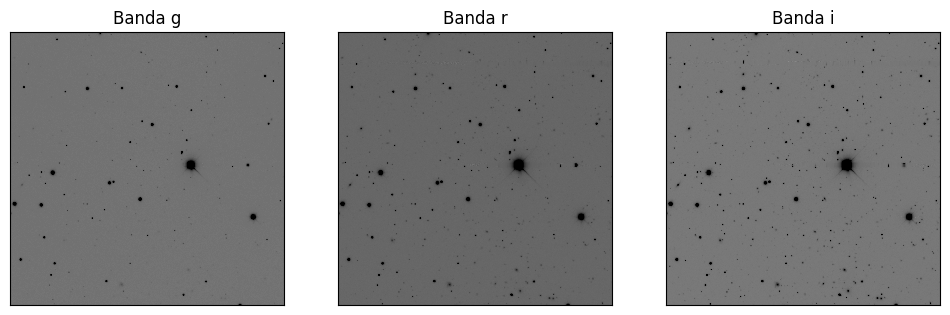

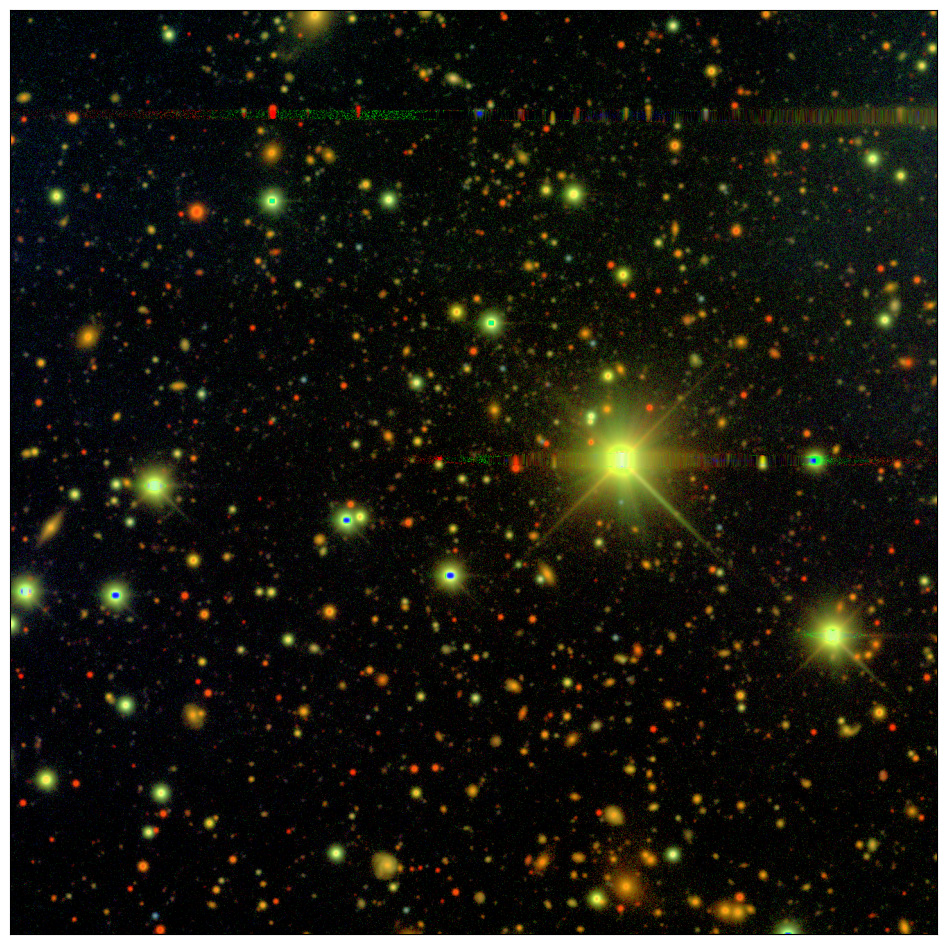

In [13]:
# Ahora graficar la imagen por banda y una imagen a 3 colores
gimage2 = gimage-np.median(gimage)
rimage2 = rimage-np.median(rimage)
iimage2 = iimage-np.median(iimage)
img = make_lupton_rgb(iimage2, rimage2, gimage2, Q=10, stretch=30)
graficar_imagenes(images)

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(1,1,1)

ax.imshow(img,origin='lower')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


<a class="anchor" id="resources"></a>
## Recursos y referencias

Nidever et al. (2020) "Second Data Release of the All-sky NOIRLab Source Catalog", AJ, https://arxiv.org/abs/2011.08868

Nidever et al. (2018) "First Data Release of the All-sky NOAO Source Catalog": http://adsabs.harvard.edu/abs/2018AJ....156..131N

McConnachie et al. (2012, AJ, 144, 4) "The Observed Properties of Dwarf Galaxies in and around the Local Group":
http://adsabs.harvard.edu/abs/2012AJ....144....4M

Bechtol, K., et al. (2015, ApJ, 807, 50) "Eight New Milky Way Companions Discovered in First-year Dark Energy Survey Data":
http://adsabs.harvard.edu/abs/2015ApJ...807...50B

Koposov et al. (2008, ApJ, 686, 279) "The Luminosity Function of the Milky Way Satellites": http://adsabs.harvard.edu/abs/2008ApJ...686..279K
